In [0]:
%matplotlib inline  #required in ubuntu not in windows|

UsageError: unrecognized arguments: #required in ubuntu not in windows|


In [0]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
import numpy as np

In [0]:
type(mnist)

sklearn.utils.Bunch

In [0]:
X= mnist.data
y=(mnist.target=='5').astype(np.float32)

In [0]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

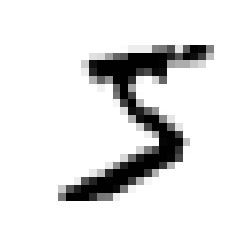

In [0]:
import matplotlib as mlp #only to display the image that is the number that our dataset is about
import matplotlib.pyplot as plt

some_digit =X[0]
some_digit_image=some_digit.reshape(28,28)  #784 one d array converted to 28X28 2d array so that it could be displayed

plt.imshow(some_digit_image,cmap= mlp.cm.binary ,interpolation="nearest")   
plt.axis("off")
plt.show()

In [0]:
X.shape

(70000, 784)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd_clf= SGDClassifier(loss='log',penalty=None,max_iter=1000,learning_rate='constant',eta0=0.1)

In [0]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
sgd_clf.predict([X[0]])

array([1.], dtype=float32)

In [0]:
from sklearn.model_selection import cross_val_score #cross validation by library

In [0]:
score= cross_val_score(sgd_clf,X_train,y_train,scoring='accuracy',cv=3)

In [0]:
score

array([0.96121498, 0.96073284, 0.95580199])

In [0]:
from sklearn.model_selection import StratifiedKFold #cross validation by scratch

In [0]:
skfold= StratifiedKFold(n_splits=3,random_state=42)

In [0]:
from sklearn.base import clone   #this is custom cross validation by scratch
for train_index,test_index in skfold.split(X_train,y_train):
  sgd_clone=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  y_train_folds=y_train[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train[test_index]
  sgd_clone.fit(X_train_folds,y_train_folds)
  predictions=sgd_clone.predict(X_test_fold)
  num_correct=sum(predictions==y_test_fold)
  score=num_correct/len(predictions)   #this can be any type of accuracy
  print(score)
  
  

0.9619649649113409
0.9621792467991643
0.9687667416693453


In [0]:
from sklearn.model_selection import cross_val_predict

In [0]:
y_preds= cross_val_predict(sgd_clf,X_train,y_train,cv=3)    #this is done to get unbiased prediction udinf cross validation concept

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
conf_mat= confusion_matrix(y_train,y_preds)

In [0]:
conf_mat

array([[49931,   987],
       [ 1300,  3782]])

In [0]:
conf_mat2= confusion_matrix(y_train,y_train)  #ideal case with all correct

In [0]:
conf_mat2

array([[50918,     0],
       [    0,  5082]])

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [0]:
precision_score(y_train,y_preds)

0.7930383728244915

In [0]:
4336/ (4336+2311)   #by formula

0.6523243568527155

In [0]:
recall_score(y_train,y_preds)

0.7441951987406533

In [0]:
f1_score(y_train,y_preds)

0.7678408283423003

In [0]:
4336/(4336+746)

0.8532073986619442

In [0]:
sgd_clf.predict([X[0]])

array([1.], dtype=float32)

In [0]:
df=sgd_clf.decision_function  #we are asking the sgd classifier for its decision function so that we can get the threshold it is taking

In [0]:
score=df([X[0]])

In [0]:
score

array([321149.51686507])

In [0]:
from sklearn.metrics import precision_recall_curve

In [0]:
y_score=cross_val_predict(sgd_clf,X_train,y_train,method='decision_function')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
precisions,recalls,thresolds= precision_recall_curve(y_train,y_score)   #it will give you three lists ..one list give yu only precision..recall..thresolds

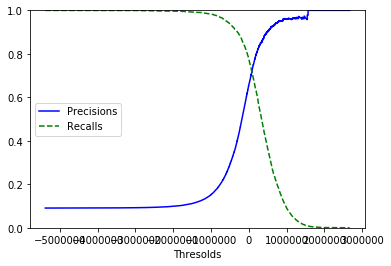

In [0]:
def plot_precision_recall_vs_thresold(precisions,recalls,thresolds):   #by the graph we can get the thresold for particular precision 
  plt.plot(thresolds,precisions[:-1],'b-',label="Precisions")
  plt.plot(thresolds,recalls[:-1],'g--',label="Recalls")
  plt.xlabel("Thresolds")
  plt.legend(loc='center left')
  plt.ylim(0,1)
  
plot_precision_recall_vs_thresold(precisions,recalls,thresolds)
plt.show()

In [0]:
#another way to get the thresold for the particular precison value(0.9) here
precisions >= 0.9

array([False, False, False, ...,  True,  True,  True])

In [0]:
np.argmax(precisions>=0.9)

53849

In [0]:
precisions[52254]

0.8179112554112554

In [0]:
thresolds[np.argmax(precisions>=0.9)]  #or thresolds[52254]

488392.5605033955

In [0]:
thresold= thresolds[np.argmax(precisions >=0.9)]

In [0]:
y_preds_2= y_score >= thresold

In [0]:
precision_score(y_train,y_preds_2)

0.900047596382675

In [0]:
recall_score(y_train,y_preds_2)

0.37209759937032666

In [0]:
i= X_test[0]

In [0]:
s= df([i]) 

In [0]:
s> thresold

array([False])

In [0]:
#30th may 2019

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score

In [0]:
fpr,tpr,thresolds =roc_curve(y_train,y_score)  #here you will get three listd  respectively

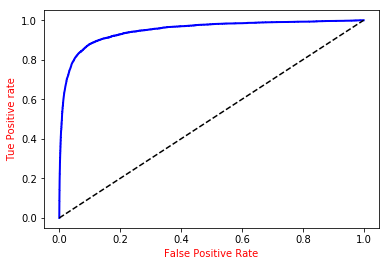

In [0]:
def plot_tpr_vs_fpr(fpr,tpr,label=None):
  plt.plot(fpr,tpr,'b-',linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('False Positive Rate',color='r')
  plt.ylabel('Tue Positive rate',color='r')
  
plot_tpr_vs_fpr(fpr,tpr)
plt.show()
  
  

In [0]:
sgd_auc= roc_auc_score(y_train,y_score)

In [0]:
sgd_auc

0.9488512825036075

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
random_clf=RandomForestClassifier(random_state=42)

In [0]:
random_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_score_random=random_clf.predict_proba([X[0]])

In [0]:
y_score_random

array([[0.1, 0.9]])

In [0]:
y_score_random=cross_val_predict(random_clf,X_train,y_train,method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
y_score_random

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [0]:
y_score_random_pos=y_score_random[:,1]  #so that onlu positive probabily goes not both as roc_curve function takes only 1 va;lye in 2nd parameter

In [0]:
fpr_random,tpr_random,thresolds=roc_curve(y_train,y_score_random_pos)

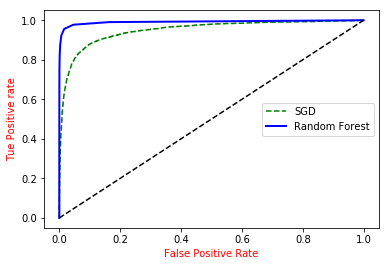

In [0]:
plt.plot(fpr,tpr,'g--',label='SGD')
plot_tpr_vs_fpr(fpr_random,tpr_random,label='Random Forest') #can be done by directly calling the func plt.plot
plt.legend(loc='center right')
plt.show()

# this plot shows that the random forest classifier is best classifier as it is close to one

In [0]:
sgd_auc_random= roc_auc_score(y_train,y_score_random[:,1])

In [0]:
sgd_auc_random

0.9916006717222756